In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sejalchandak/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Step 1: Load and Preprocess Data
df = pd.read_csv("/Users/sejalchandak/Desktop/ADS Assigment 3/spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]

# Basic Data Exploration
print("Number of Rows:", len(df))
print("\nColumn Names:")
print(df.columns)
print("\nLabel Distribution:")
print(df['v1'].value_counts())

df.columns = ['label', 'message']
df['label'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)


stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['message'] = df['message'].apply(preprocess_text)

Number of Rows: 5572

Column Names:
Index(['v1', 'v2'], dtype='object')

Label Distribution:
ham     4825
spam     747
Name: v1, dtype: int64


In [ ]:
# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])
y = df['label']


In [ ]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [ ]:
# Step 4: Naive Bayes Model
import pickle
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print(nb_preds)

# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])
y = df['label']

nb_accuracy = accuracy_score(y_test, nb_preds)
nb_precision = precision_score(y_test, nb_preds)
nb_recall = recall_score(y_test, nb_preds)
nb_f1 = f1_score(y_test, nb_preds)

print(f'Naive Bayes Model:')
print(f'Accuracy: {nb_accuracy}, Precision: {nb_precision}, Recall: {nb_recall}, F1 Score: {nb_f1}')

# Save both the model and the TF-IDF vectorizer
file_name = 'saved_nb_model_vectorizer.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(nb_model, file)
    pickle.dump(tfidf_vectorizer, file)
svm_preds = nb_model.predict(X_test)

[0 0 1 ... 0 0 1]
Naive Bayes Model:
Accuracy: 0.968609865470852, Precision: 1.0, Recall: 0.7666666666666667, F1 Score: 0.8679245283018869


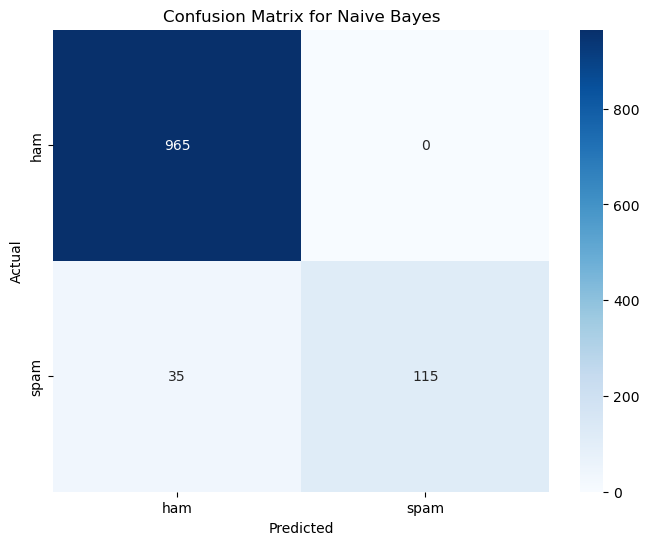

In [ ]:
# Plot Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, nb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Step 5: SVM Model
import pickle
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])
y = df['label']

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_tfidf, y)

# Save both the model and the TF-IDF vectorizer
file_name = 'saved_model_with_vectorizer.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(svm_model, file)
    pickle.dump(tfidf_vectorizer, file)
svm_preds = svm_model.predict(X_test)

print(svm_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds)
svm_recall = recall_score(y_test, svm_preds)
svm_f1 = f1_score(y_test, svm_preds)

print(f'SVM Model:')
print(f'Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1 Score: {svm_f1}')

[0 0 1 ... 0 0 1]
SVM Model:
Accuracy: 0.9910313901345291, Precision: 0.9861111111111112, Recall: 0.9466666666666667, F1 Score: 0.9659863945578231


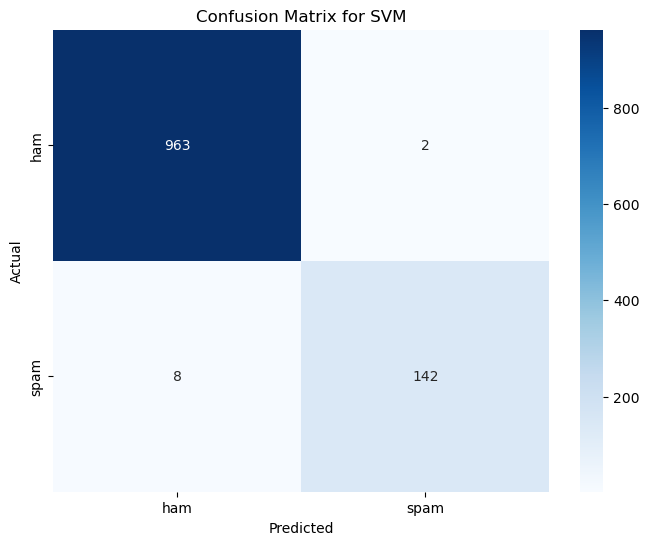

In [ ]:
# Plot Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, svm_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Epoch 1/10
112/112 [==============================] - 1s 5ms/step - loss: 0.3548 - accuracy: 0.8763 - val_loss: 0.1241 - val_accuracy: 0.9742
Epoch 2/10
112/112 [==============================] - 1s 5ms/step - loss: 0.0659 - accuracy: 0.9857 - val_loss: 0.0724 - val_accuracy: 0.9809
Epoch 3/10
112/112 [==============================] - 1s 6ms/step - loss: 0.0218 - accuracy: 0.9941 - val_loss: 0.0767 - val_accuracy: 0.9821
Epoch 4/10
112/112 [==============================] - 1s 6ms/step - loss: 0.0106 - accuracy: 0.9983 - val_loss: 0.0857 - val_accuracy: 0.9832
Epoch 5/10
112/112 [==============================] - 1s 6ms/step - loss: 0.0078 - accuracy: 0.9989 - val_loss: 0.0872 - val_accuracy: 0.9821
Epoch 6/10
112/112 [==============================] - 1s 6ms/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.0920 - val_accuracy: 0.9821
Epoch 7/10
112/112 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0985 - val_accuracy: 0.9809
Epoch 

/Users/sejalchandak/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


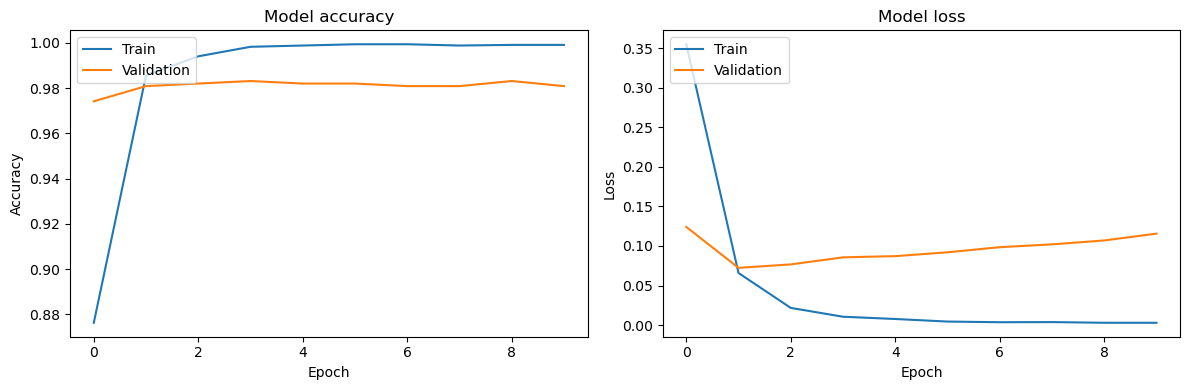

In [ ]:
# Step 6: CNN Model
from keras.models import load_model
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['message'])
X_seq = tokenizer.texts_to_sequences(df['message'])
max_len = max(len(x) for x in X_seq)
X_seq = pad_sequences(X_seq, maxlen=max_len)

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y, test_size=0.2, random_state=42)

cnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2)
cnn_model.save('cnn_model.h5')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['message'])
X_seq = tokenizer.texts_to_sequences(df['message'])
X_seq = pad_sequences(X_seq, maxlen=max_len)

In [ ]:
#Splitting the dataser:

X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y, test_size=0.2, random_state=42)

In [ ]:
# Defining the LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the LSTM Model
lstm_history = lstm_model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_split=0.2)

# Saving the LSTM Model
lstm_model.save('lstm_model.h5')

Epoch 1/10
112/112 [==============================] - 10s 72ms/step - loss: 0.2336 - accuracy: 0.9265 - val_loss: 0.0656 - val_accuracy: 0.9798
Epoch 2/10
112/112 [==============================] - 8s 73ms/step - loss: 0.0428 - accuracy: 0.9877 - val_loss: 0.0658 - val_accuracy: 0.9821
Epoch 3/10
112/112 [==============================] - 8s 73ms/step - loss: 0.0215 - accuracy: 0.9958 - val_loss: 0.0767 - val_accuracy: 0.9753
Epoch 4/10
112/112 [==============================] - 8s 72ms/step - loss: 0.0126 - accuracy: 0.9978 - val_loss: 0.0955 - val_accuracy: 0.9809
Epoch 5/10
112/112 [==============================] - 8s 73ms/step - loss: 0.0091 - accuracy: 0.9980 - val_loss: 0.1054 - val_accuracy: 0.9798
Epoch 6/10
112/112 [==============================] - 8s 73ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.1274 - val_accuracy: 0.9776
Epoch 7/10
112/112 [==============================] - 8s 73ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.1146 - val_accuracy: 0.984

In [ ]:
# Evaluating the LSTM Model
lstm_preds = (lstm_model.predict(X_test_seq) > 0.5).astype("int32")
lstm_accuracy = accuracy_score(y_test_seq, lstm_preds)
lstm_precision = precision_score(y_test_seq, lstm_preds)
lstm_recall = recall_score(y_test_seq, lstm_preds)
lstm_f1 = f1_score(y_test_seq, lstm_preds)

print(f'LSTM Model Evaluation:')
print(f'Accuracy: {lstm_accuracy}, Precision: {lstm_precision}, Recall: {lstm_recall}, F1 Score: {lstm_f1}')

35/35 [==============================] - 0s 9ms/step
LSTM Model Evaluation:
Accuracy: 0.979372197309417, Precision: 0.9440559440559441, Recall: 0.9, F1 Score: 0.9215017064846417


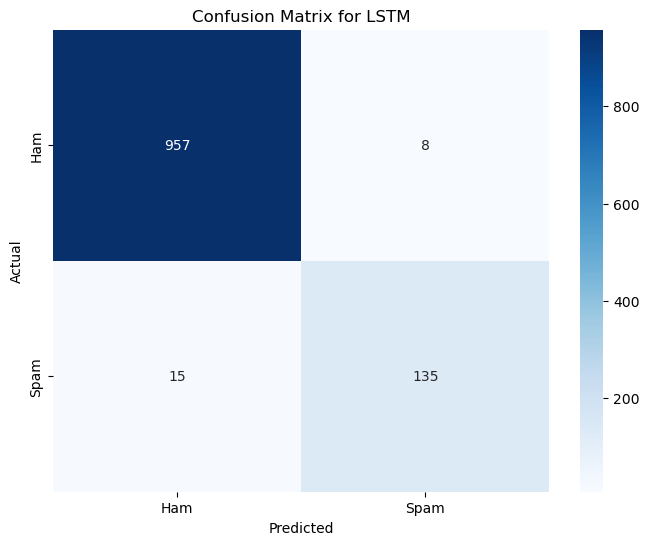

In [ ]:
# Confusion Matrix for LSTM
cm_lstm = confusion_matrix(y_test_seq, lstm_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Plotting Training History for LSTM
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

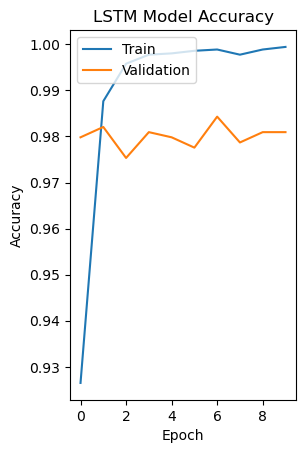

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


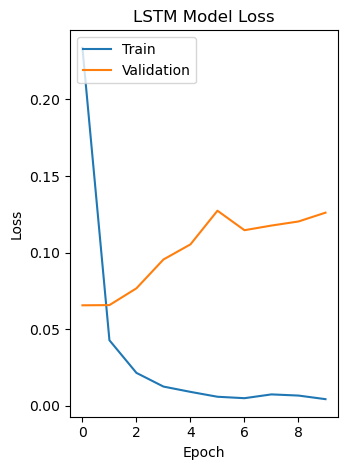

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sejalchandak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True